#### Recommender Systems
    Systems which recommend some items to the user. Here items can be anything like movies, products, songs, interaction with the shown product in the ad, clicking on the product shown etc.,
    
    Recommender systems deals with users and items data. Collaborative filtering specially relies on user-item interaction data to make recommendations. It is also called User Item matrix
    
    For eg: lets consider movie rating system
    
    The items will be movies, users will be the users who is rating those movies
    
                    ---------------------------------------------
                    Items/Users | Alice | Bob | Carol | Dean | 
                    ---------------------------------------------
                     Long Love  | 5     | 0   |  1    |   3  |
                     First Love | 4     | ?   |  2    |   4  |
                     Karate Kid | ?     | 1   |  ?    |   3  |
                     Star wars  | 0     | 1   |  2    |   ?  |
                     Angel      | 3     | ?   |  2    |   ?  |
                     ---------------------------------------------
    Here
$n_{u}$ = no. of users = 4

$n_m$ = no. of items(movies here) = 5

$r_{(i, j)}$ = rating of user $j$ on item $i$ in binary values (1 if user rated the item else 0)

$y_{(i,j)}$ = rating given by user $j$ on movie $i$
    
Note: $i$ represents movies and $i$ tends from 1 to $m$

$j$ represent users and $j$ tends from 1 to u

$m_j$ to denote the number of movies rated by user j

    If the user has rated 4 movies, then m(j) would be equal to 4. And if the user has rated 3 movies then m(j) would be equal to 3
    
    Note that in the user/item matrix, we have rating of movies ranging from 0 to 5(for simplitcity ,we are taking 0 also in ratings to represent that user has given very low rating, but in real world, its from 1)
    
    Here "?" represents the user has not yet watched it or seen it or interacted with yet
    
    

#### Per Item Features
    Before making recommendations based on users ratings history, we also need to learn how the user would have rated the movies that have not yet seen(? ones). And we need this prediction for every user.
    
    In order to predict the ratings for each user, we need feature of each item to learn a model on the missing features.
    
    Since, we are dealing contionuous values, we can make use of linear regression model and predict the parameters w and b for each user in order to predict missing ratings.
    
    Think of it linear regression model where per item features are model fetures (x1, x2, x3) and the target variable will be the user ratings. We will learn the model with the existing ratings using gradient descent and find out the best parameters that minimizes the cost J. Once the parameters are learned, then we can treat the missing ratings features as test instance and predict the target ratings using these learned parameters. Likewise we can perform linear regression for each user that results in different models(aka different parameters) for each user. And then we will predict all the missing ratings.
    
    Per item features are something like how much is this a romance movie, or a action movie ...
    
                    --------------------------------------------------------------------
                    Items/Users | Alice | Bob | Carol | Dean | romance(x1) | action(x2)
                    ---------------------------------------------------------------------
                     Long Love  | 5     | 0   |  1    |   3  |    0.9      |    0.1
                     First Love | 4     | ?   |  2    |   4  |    1.0      |   0
                     Karate Kid | ?     | 1   |  ?    |   3  |    0.1      |   1.0
                     Star wars  | 0     | 1   |  2    |   ?  |    0.2      |   0.9
                     Angel      | 3     | ?   |  2    |   ?  |    0.9      |   0.4
                     ---------------------------------------------------------------------
                     
      Since we have 2 features, after training using logistic regression, we will have W vector (w1, w2) and bias b for each user. These are the parameters which we use to predict the missing ratings ( using model W. X + b). This is nothing but linear regression.
      
For prediction of missing rating for user 1 Alice, w vector is $W^1$($w_1$, $w_2$), $b^1$  for movie karatekid, inputs $X(i=2)$ = ($x_1$, $x_2$) = (0.1, 1.0), b = 0.0(for now)

$\hat{y}(i=3,j=1)$ = $W^1$. $X_3$ + $b^1$

    Like wise, we predict missing ratings for all the users using their respective model paramaters
    
    Instead of fitting the model for all the users separately, we can perform it for all the users at a time using vetorization. But before that, lets see how we construct cost function for single user j.
    
    Mathematically,
        
      W(j), b(j) as the parameters for user j. And X(i) as the feature vector for movie i. 
      
      So the model we have is for user j and movie i predict the rating to be W(j).X(i)+b(j). Note that W's size will be the no. of features in X

f($X_i$) = W(j). X(i) + b(j)
                          
      So what we'd like to do is to learn the parameters W(j) and b(j), given the data that we have. That is given the ratings a user has given of a set of movies. As said the algorithm we're going to use is very similar to linear regression. 
      
      So let's write out the cost function for learning the parameters W(j) and b(j) for a given user j
      
$Loss J(W_j, b_j) = 1/2m_j \; Σ (f(X_i) - y_{(i,j)})^2 + λ/2m_j \; Σ W_j^2$
       
       And we're trying to choose parameters W and b to minimize the squared error between the predicted rating and the actual rating that was observed. 
       
       But we know the user hasn't rated all the movies, so if we're going to sum over this, we're going to sum over only over the values of i where r(i,j)=1. So we're going to sum Σ only over the movies i that user j has actually rated. So that's what this denotes, sum of all values of i where r(i,j)=1. Meaning that user j has rated that movie i.
       
$Loss J(W_j, b_j) = 1/2m_j \; Σ_{i:r(i,j)=1} (f(X_i) - y_{(i,j)})^2 + λ/2m_j \; Σ_{k=1}^n {W_{j}^k}^2$
       
    And so k= 1 to n is a number of numbers/features in X(i) and that's the same as a number of numbers in w(j). If you were to minimize this cost function J as a function of W_j and b_j using gradient descent, you should get a pretty good set of parameters for predicting user j's ratings for other movies. 
    
    Now, before moving on, it turns out that for recommended systems it would be convenient to actually eliminate this normalization term, division by m(j) term, m(j) is just a constant in this expression. And so, even if you take it out, you should end up with the same value of w and b. 
    
$Loss J(W_j, b_j) = 1/2 \; Σ_{i:r(i,j)=1} (f(X_i) - y_{(i,j)})^2 + λ/2 \; Σ_{k=1}^n {W_{j}^k}^2$
    
    The above is going to be a cost function J of W(j), b(j). 
    
    So we have that to learn the parameters w(j), b(j) for user j. We would minimize this cost function as a function of w(j) and b(j). 
    
    But instead of focusing on a single user j, let's look at how we learn the parameters for all of the users. To learn the parameters w(1), b(1), w(2), b(2),...,w(nu), b(nu), we would take this cost function on top and sum it over all the nu users.
    
$Loss J({W_1, b_1, .. {W^{n_u}}, {b^{n_u}}}) = 1/2 \; Σ_{j=1}^{n_u} \; Σ_{i:r(i,j)=1} (f(X_i) - y_{(i,j)})^2 + λ/2 \; Σ_{j=1}^{n_u} \; Σ_{k=1}^n {W_{j}^k}^2$

    So we would have sum from j=1 one to nu of the same cost function that we had written up above. And this becomes the cost for learning all the parameters for all of the users. And if we use gradient descent or any other optimization algorithm to minimize this as a function of w(1), b(1) all the way through w(nu), b(nu), then you have a pretty good set of parameters for predicting movie ratings for all the users. 
    
    So that's how you can learn parameters and predict movie ratings, if you had access to these features x1 and x2. That tell you how much is each of the movies, a romance movie, and how much is each of the movies an action movie? 
    
    But where do these features come from? And what if you don't have access to such features that give you enough detail about the movies with wish to make these predictions? 
    
    Below we'll look at the modification of this algorithm that will let you make predictions to make recommendations, even if you don't have an advanced features that describe the items of the movies in sufficient detail.

### Collaborative Filtering

    When we dont have features like x1, x2 inorder to learn parameters w, b, then we can make use of data to learn the "features" x1, x2
![collaborative%20Filtering.png](attachment:collaborative%20Filtering.png)

    Lets imagine, we alreasy have learned parameters for each user i.e
    
    W1 = [5 0]   W2 = [5 0]    W3 = [0 5]    W4 = [0 5] 
    b1 = 0       b2 = 0        b3 = 0        b4 = 0
         
    Based on these parameters and the existing ratings data, we might be able to guess the features x1 and x2
    
    Since, we already have learned parameters, we can predict the missing/existing rating of user j with (Wj Xi + bj)
    
    For eg we know W_1 . X_1 + b_1 = 5 for user 1, movie 1, X_1 = input data of movie 1 X_1 = (x1, x2) for movie 1
    We kept all the biases to 0, so now W_1. X_1 ~= 5
    
    Now since W_1 = [5 0], what values of X1 will make W_1. X_1 ~= 5 
                                                       W_2. X_1 ~= 5
                                                       W_3. X_1 ~= 0
                                                       W_4. X_1 ~= 0
    
    More probably id X_1 = [1 0] would satify for all the ratings above
    
    This means we can make a guess on predicting the features x1, x2 for all the movies when we have parameters of all the users
   
     If you have the parameters for all four users here, and if you have four ratings in this example that you want to try to match, you can take a reasonable guess at what lists a feature vector X_1 for movie 1 that would make. 
     
     Similarly, if you have these parameter vectors, you can also try to come up with a feature vector X_2 for the second movie, feature vector X_3 for the third movie, and so on to try to make the algorithm's predictions on these additional movies close to what was actually the ratings given by the users.
     
     By the way, notice that this works only because we have parameters for four users. That's what allows us to try to guess appropriate features, X_1. This is why in a typical linear regression application if you had just a single user, you don't actually have enough information to figure out what would be the features, x_1 and x_2, which is why in the linear regression contexts that you saw in course 1, you can't come up with features x_1 and x_2 from scratch. But in collaborative filtering, is because you have ratings from multiple users of the same item with the same movie. That's what makes it possible to try to guess what are possible values for these features.
     
     Cost Function to learn features
     -------------------------------
    Given (W1, b1, W2, b2,... Wnu, bnu) for all the users

To learn $X_i$ 

$Loss J(X_i) = 1/2 \; Σ_{j:r(i,j)=1} (W_j . X_i + b_j - y_{(i,j)})^2 + λ/2 \; Σ_{k=1}^n {x_{k}^i}^2$


To learn ${X_1}, {X_2},..{X^{n_m}}$ at a time

$Loss J({X_1}, {X_2},..{X^{n_m}}) = 1/2 \; Σ_{i=1}^{n_m} \; Σ_{j:r(i,j)=1} (W_j . X_i + b_j - y_{(i,j)})^2 + λ/2 \; Σ_{i=1}^{n_m} \; Σ_{k=1}^n {x_{k}^i}^2$


    So if you have parameters w and b, all the users, then minimizing this cost function as a function of x1 through x^n_m using gradient descent or cellular algorithm, this will actually allow you to take a pretty good guess at learning good features for the movies. 
    
    This is pretty remarkable, for most machine learning applications the features had to be externally given but in this algorithm, we can actually learn the features for a given movie. But what we've done so far is, we assumed you had those parameters w and b for the different users. Where do you get those parameters from? 
    
    Well, let's put together the algorithm from the last cell for learning w and b and what we just talked about in this cell for learning x and that will give us our "Collaborative Filtering Algorithm" 
    
Now, it turns out that if we put these two together,the terms $Σ_{i=1}^{n_m} \; Σ_{j:r(i,j)=1}$ and $Σ_{j=1}^{n_u} \; Σ_{i:r(i,j)=1} (f(X_i) - y_{(i,j)})^2$. Notice that sum over j of all values of i is that r,i,j equals 1 is the same as summing over all values of i with all j where r,i,j is equal to 1. 
    
    This summation is just summing over all user movie pairs where there is a rating of the usual squared cost function
    
    Lets put these two cost functions together where we are writing out the summation more explicitly as summing over all pairs i and j, where we do have a rating
    
    Overall cost function for learning w, b, and x.
    
$Loss J(W, b, X) = 1/2 \; Σ_{(i,j):r(i,j)=1} (W_j . X_i + b_j - y_{(i,j)})^2 + λ/2 \; Σ_{j=1}^{n_u} \; Σ_{k=1}^n {w_{k}^j}^2 + λ/2 \; Σ_{i=1}^{n_m} \; Σ_{k=1}^n {x_{k}^i}^2 $

    
    It turns out that if you minimize this cost function as a function of w and b as y  x, then this algorithm actually works.

#### How do you minimize this cost function as a function of w, b, and x? 
     
     One thing you could do is to use gradient descent. 
     
     In course 1 when we learned about linear regression, this is the gradient descent algorithm you had seen, where we had the cost function J, which is a function of the parameters w and b, and we'd apply gradient descent as follows. With collaborative filtering, the cost function is in a function of just w and b is now a function of w, b, and x. I'm using w and b here to denote the parameters for all of the users and x here just informally to denote the features of all of the movies. But if you're able to take partial derivatives with respect to the different parameters, you can then continue to update the parameters as follows.
![collaborative%20Filtering%20gradients.png](attachment:collaborative%20Filtering%20gradients.png)
     
     But now we need to optimize this with respect to x as well. We also will want to update each of these parameters x using gradient descent. It turns out that if you do this, then you actually find pretty good values of w and b as well as x. 
     
     The key takeaway from this is that the parameters to this model are w and b, and x now is also a parameter, which is why we minimize the cost function as a function of all three of these sets of parameters, w and b, as well as x. The algorithm we derived is called collaborative filtering, and the name collaborative filtering refers to the sense that because multiple users have rated the same movie collaboratively, given you a sense of what this movie maybe like, that allows you to guess what are appropriate features for that movie, and this in turn allows you to predict how other users that haven't yet rated that same movie may decide to rate it in the future.
     
     This collaborative filtering is this gathering of data from multiple users. This collaboration between users to help you predict ratings for even other users in the future. Note, here we are learning the input features from the data, and the parameters for each user.
     
     For recommendations, we will use these features, and find out the similar items/movies by calculating the distance between the movies/items using squared distance or L2 norm. Based on the distances, we will indetify the similar movies that are in less distance from our current movie, and then show these movies as recommendations
     
     . One more use case where collaborative filtering works well if, imagine you run a online book store and collects the ratings of many users. You want to use this to identify which books are similar to each other(i.e if a user likes a certain book, what are other books that they might also like?). You can also find similar books by learning feature values using collaborative filtering
     
     
     So far, our problem formulation has used movie ratings from 1- 5 stars or from 0- 5 stars. A very common use case of recommended systems is when you have binary labels such as that the user favors, or like, or interact with an item.
     
     In case of binary ratings, then we use logistic regression and its cost function in place of linear regression's mean squared error

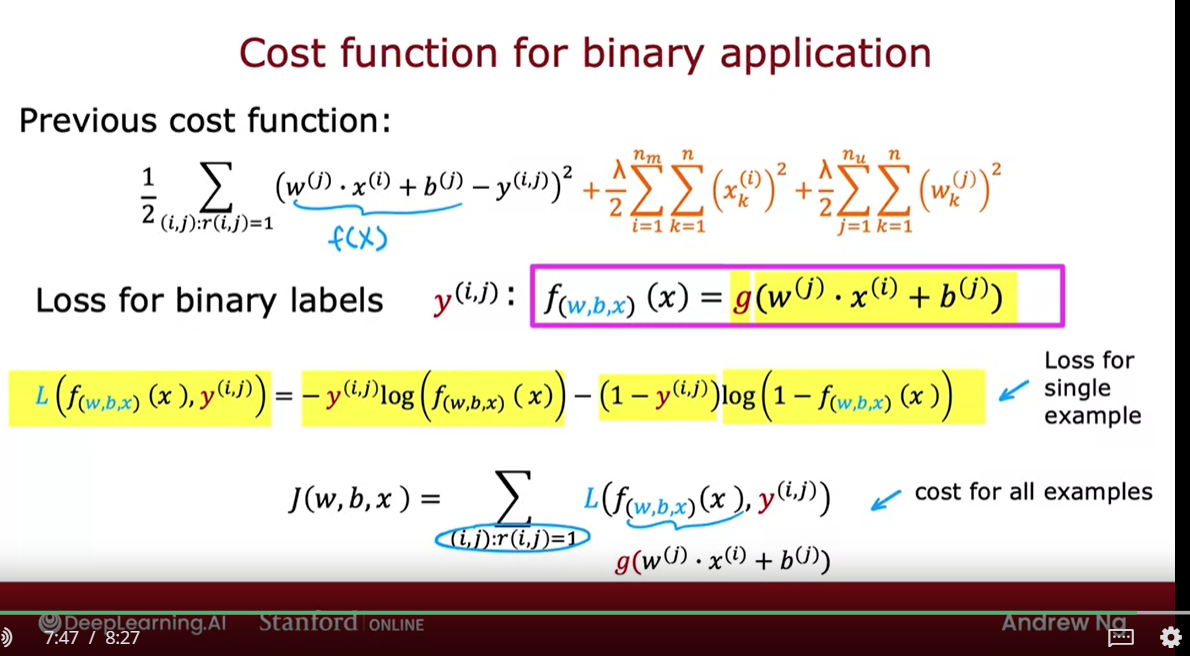

#### Mean Normalization
    
    Mean normalization in collaborative filtering is a technique used to address the issue of user rating biases in recommendation systems. Collaborative filtering algorithms rely on user-item interaction data, where users provide ratings or feedback for items they have interacted with. However, users' rating behaviors can be subjective and vary widely. Some users might tend to give higher ratings to most items, while others might consistently rate items lower.

    The mean normalization process involves adjusting the user ratings by subtracting the user's average rating from each individual rating. This helps to center the ratings around the user's mean rating, effectively removing the user-specific bias. The normalized ratings represent how much a user's rating deviates from their own average rating, providing a more consistent and fair representation of their preferences.
    
    Mean Normalization is normalizing the ratings by subtracting each review from the mean of the ratings per item(row average of items/movies). This will make the optimization algorithms like gradient descent or adam to converge faster.
    
    This also helps when we have new users who rated very few movies or the new user who didnt rate any of the movies yet. If we get the new user like that, then that initial ratings will be "?" that means no rating. Since it doesn't have any rating, we dont include them in the cost function. 
    
    In cost function, we are regularizing the parameters using regularization parameter which will prevent overfitting and keep the parameters to be lower value. So the w's and b's of other users will be low and this new user will be intialised to zero. Hence in that case, if w and b of this user is 0, then while predicting this user's ratings with the model w.x + b and input features, the model will just predict the rating as zero since w and b are zero for this user.
    
    This is not ideal situation. Hence we perform mean normalization, so now for this user, the intial rating will be 0 - mu = -mu as their's initial rating instead of 0.
    
    This makes the rating not to be zero for the new user. It provides a reasonable starting point
    
    This also works when in case where a new item/movie are added to the system and it doesnt have much ratings as this is not popular yet. In that case, we perform mean normalization across columns by averaging all the movies and subtracting each column value from this mean, per user to get average rating for this new movie.

    The formula for mean normalization is as follows:

    Normalized Rating = Rating - User's Mean Rating (column average incase of new item)
    Normalized Rating = Rating - Item's Mean Rating (row average in case of new user)

    Here's a step-by-step explanation of mean normalization in collaborative filtering:

    Calculate the mean rating for each user: Compute the average rating given by each user to all the items they have rated.

    Subtract the user's mean rating from each rating: For each user-item pair, subtract the user's mean rating from the actual rating given by the user. This step normalizes the ratings for each user.

    Use the normalized ratings for collaborative filtering: After mean normalization, the collaborative filtering algorithm utilizes these adjusted ratings to find similarities between users or items and make recommendations accordingly.

    Mean normalization can be particularly useful in scenarios where user rating behaviors are significantly imbalanced, and some users tend to be consistently harsh or generous in their ratings. By applying mean normalization, the recommendation system can focus on the relative differences in ratings rather than absolute values, leading to more accurate and personalized recommendations.
    
#### Finding Related Items
    Collaborative filtering relies on user-item interaction data to make recommendations. The basic idea is to find similarities between users or items and use this information to make personalized recommendations. After learning input features for all the items and parameters W, b for each user, to make recommendations, the system will find the similar items/movies based on their input features. If any user rates high for one item, then the system will show other items/movies which are similar to this movie, as recommendations to the user.
    
    To find the similarity, distance measures like the squared euclidean distance, jaccard similarity will be used and find out the top k movies that ar similar to thos movie.
    
    Like wise, the system can also recommend movies based on similarities between users ratings. If any user rating is similar to any other user, then the system will recommend those movies which are rated by the similar user to other user
    
    
#### Cold start problem

     Collaborative filtering relies on user-item interaction data to make recommendations. The basic idea is to find similarities between users or items and use this information to make personalized recommendations. However, the cold start problem arises in the following situations:

    New user cold start: When a new user joins the system and has not yet provided any ratings or interactions with items, there is no historical data available to understand the user's preferences and make accurate recommendations.

    New item cold start: When a new item is introduced to the system and has not yet received any ratings or interactions from users, there is no data available to understand the item's characteristics and match it with relevant users.

    Sparse data cold start: When the user-item interaction data is sparse, meaning some users have rated only a few items or some items have received very few ratings, it becomes challenging to find sufficient data to make reliable recommendations.

    The cold start problem can significantly degrade the quality of recommendations for new users or new items, leading to a poor user experience and limited adoption of the recommendation system when using Collaborative Filtering.



### In this exercise, you will implement collaborative filtering to build a recommender system for movies.

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

    ------------------------------------------------------------------------------------------------------------------------
    General
    Notation	                      Description	                                                Python (if any)
    ------------------------------------------------------------------------------------------------------------------------
    r(i, j)            scalar; = 1 if user j rated game i = 0 otherwise	
    y(i, j)            scalar; = rating given by user j on game i (if r(i,j) = 1 is defined)	
    wj                 vector; parameters for user j	
    bj                 scalar; parameter for user j	
    xi                 vector; feature ratings for movie i	
    nu                 number of users	                                                             num_users
    nm                 number of movies                                                              num_movies
    n                  number of features	                                                         num_features
    X                  matrix of vectors xi                                                          X
    W                  matrix of vectors wj                                                          W
    b                  vector of bias parameters bj                                                  b
    R                  matrix of elements r(i,j)                                                     R
   ---------------------------------------------------------------------------------------------------------------------

#### 2 - Recommender Systems
    In this lab, you will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings. The goal of a collaborative filtering recommender system is to generate two vectors: For each user, a 'parameter vector' that embodies the movie tastes of a user. For each movie, a feature vector of the same size which embodies some description of the movie. The dot product of the two vectors plus the bias term should produce an estimate of the rating the user might give to that movie.

    The diagram below details how these vectors are learned.
![ColabFilterLearn.png](attachment:ColabFilterLearn.png)

    Existing ratings are provided in matrix form as shown. Y contains ratings; 0.5 to 5 inclusive in 0.5 steps. 0 if the movie has not been rated. R has a 1 where movies have been rated. Movies are in rows, users in columns. Each user has a parameter vector w_user and bias. Each movie has a feature vector x_movie. These vectors are simultaneously learned by using the existing user/movie ratings as training data. One training example is shown above: w_1 . x_1 + b_1 = 4. It is worth noting that the feature vector x_movie must satisfy all the users while the user vector w_user must satisfy all the movies. This is the source of the name of this approach - all the users collaborate to generate the rating set.

![ColabFilterUse.png](attachment:ColabFilterUse.png)
    
    Once the feature vectors and parameters are learned, they can be used to predict how a user might rate an unrated movie. This is shown in the diagram above. The equation is an example of predicting a rating for user one on movie zero.

    In this exercise, you will implement the function "cofiCostFunc" that computes the collaborative filtering objective function. After implementing the objective function, you will use a TensorFlow custom training loop to learn the parameters for collaborative filtering. The first step is to detail the data set and data structures that will be used in the lab.


#### 3 - Movie ratings dataset
    The data set is derived from the MovieLens "ml-latest-small" dataset.
    [F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872]

    The original dataset has 9000 movies rated by 600 users. The dataset has been reduced in size to focus on movies from the years since 2000. This dataset consists of ratings on a scale of 0.5 to 5 in 0.5 step increments. The reduced dataset has nu=443 users and nm=4778 movies
    
    Below, you will load the movie dataset into the variables Y and R

    The matrix Y (nm x nu matrix) stores the ratings y(i, j). The matrix R is an binary-valued indicator matrix, where R(i, j)=1 if user j gave a rating to movie i, and R(i, j)=0 otherwise.

    Throughout this part of the exercise, you will also be working with the matrices, X, W and b:

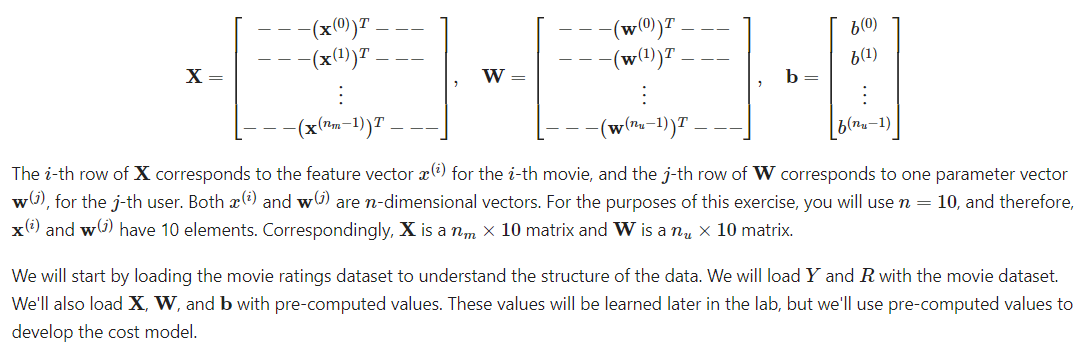

In [2]:
#Load data
def load_ratings_small():
    file = open("./small_movies_R.csv", "rb")
    R = np.loadtxt(file, delimiter=",")
                
    file = open("./small_movies_Y.csv", "rb")
    Y = np.loadtxt(file, delimiter=",")
    
    return Y, R


Y, R = load_ratings_small()

In [3]:
print(Y.shape)
print(R.shape)

(4778, 443)
(4778, 443)


In [100]:
np.set_printoptions(linewidth=200, edgeitems=20)
print(f"\n Y Matrix \n {Y[:5]}")
print(f"\n R Matrix \n {R[:5]}")


 Y Matrix 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 4. 3. 3.]]

 R Matrix 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 

In [8]:
#Loading precalculated parameters and features X, W, b
def load_precalc_params_small():
    file = open("./small_movies_X.csv", "rb")
    X = np.loadtxt(file, delimiter=",")
                
    file = open("./small_movies_W.csv", "rb")
    W = np.loadtxt(file, delimiter=",")
    
    file = open("./small_movies_b.csv", "rb")
    b = np.loadtxt(file, delimiter=",")
    b = b.reshape(1, -1)
    
    num_movies = len(X)
    num_features = X.shape[1]
    num_users = len(W)
    return X, W, b, num_movies, num_features, num_users

    
X, W, b, num_movies, num_features, num_users = load_precalc_params_small()

In [9]:
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

X (4778, 10)
W (443, 10)
b (1, 443)
num_features 10
num_movies 4778
num_users 443


In [7]:
#Mean Normalization for first user 0
# From the matrix, we can compute statistics like average rating.
mean = np.mean(Y[0, R[0, :].astype("bool")])
print(f"Average rating for movie 1 : {mean:0.3f} / 5" )

Average rating for movie 1 : 3.400 / 5


#### 4 - Collaborative filtering learning algorithm
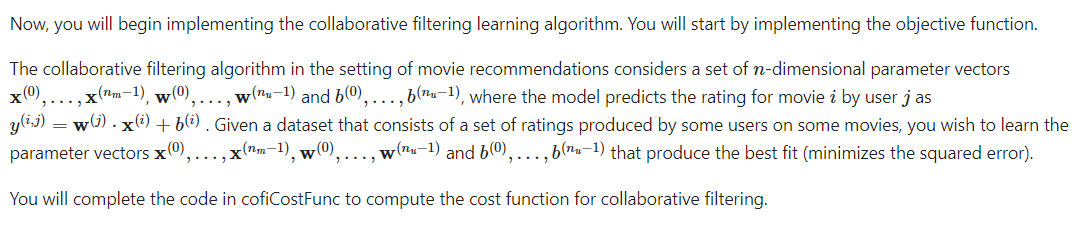

![collaborative%20Filtering%20cost%20function.png](attachment:collaborative%20Filtering%20cost%20function.png)

where regularization = $λ/2 \; Σ_{j=0}^{n_u-1} \; Σ_{k=0}^{n-1} {w_{k}^j}^2 + λ/2 \; Σ_{i=0}^{n_m-1} \; Σ_{k=0}^{n-1} {x_{k}^i}^2 $

    You should now write cofiCostFunc (collaborative filtering cost function) to return this cost.


#### Exercise 1
    For loop Implementation:
    Start by implementing the cost function using for loops. Consider developing the cost function in two steps. First, develop the cost function without regularization. A test case that does not include regularization is provided below to test your implementation. Once that is working, add regularization and run the tests that include regularization. Note that you should be accumulating the cost for user j and movie i only if R(i, j) = 1
    
    Note: Regularization just squares each element of the W array and X array and them sums all the squared elements. 

In [41]:
#Collaboratuve Filtering cost function
def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies, num_features)): matrix of item features (x1,..x10)
      W (ndarray (num_users, num_features)) : matrix of user parameters w
      b (ndarray (1, num_users)             : vector of user parameters b
      Y (ndarray (num_movies, num_users)    : matrix of user ratings of movies (user/item matrix)
      R (ndarray (num_movies, num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float)                       : regularization parameter
    Returns:
      J (float) : Cost
    """
    J = 0.0
    m, u = Y.shape
    for j in range(u): 
        #iterate through each user
        W_j = W[j, :] #get the w vector for each user
        b_j = b[0, j] #get the b value
        for i in range(m): 
            #iterate through each movie and calculate the error
            X_i = X[i, :]
            y = Y[i, j]
            r = R[i, j]
            f_x = np.dot(W_j, X_i) + b_j
            squared_error = np.square((f_x - y))
            J += r * squared_error #accumulating all the costs for each item and each user
    if lambda_ != 0:
        #add regularization terms to the cost J
        J += ((lambda_) * np.sum(np.square(W))) + ((lambda_) * np.sum(np.square(X)))
    J = J / 2
    return J
        

In [42]:
#check the function
# Reduce the data set size so that this runs faster
num_users_r = 4
num_movies_r = 5 
num_features_r = 3

X_r = X[:num_movies_r, :num_features_r]
W_r = W[:num_users_r, :num_features_r]
b_r = b[0, :num_users_r].reshape(1, -1)
Y_r = Y[:num_movies_r, :num_users_r]
R_r = R[:num_movies_r, :num_users_r]

J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, lambda_=0)
print(f"Cost: {J:0.2f}")

Cost: 13.67


In [43]:
# Evaluate cost function with regularization 
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5);
print(f"Cost (with regularization): {J:0.2f}")

Cost (with regularization): 28.09


##### Vectorized Implementation
    It is important to create a vectorized implementation to compute J, since it will later be called many times during optimization. The linear algebra utilized is not the focus of this series, so the implementation is provided. If you are an expert in linear algebra, feel free to create your version without referencing the code below.

    Run the code below and verify that it produces the same results as the non-vectorized version.

In [208]:
#Collaborative filtering cost function vectorized implementation
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    error = ((tf.linalg.matmul(X, tf.transpose(W)) + b) - Y) * R
    J = 0.5 * tf.reduce_sum(error ** 2) + (lambda_ / 2) * (tf.reduce_sum(W ** 2) +  tf.reduce_sum(X ** 2))
    return J
    

In [209]:
# Evaluate vectorized cost function
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 0);
print(f"Cost: {J:0.2f}")

J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5);
print(f"Cost (with regularization): {J:0.2f}")

Cost: 13.67
Cost (with regularization): 28.09


### 5 - Learning movie recommendations
    After you have finished implementing the collaborative filtering cost function, you can start training your algorithm to make movie recommendations for yourself.

    In the cell below, you can enter your own movie choices. The algorithm will then make recommendations for you! We have filled out some values according to our preferences, but after you have things working with our choices, you should change this to match your tastes. A list of all movies in the dataset is in the file movie list.
    
    Basically, the file contains mean rating for all the movies that are there in Y above(4778 movies), movie names, no of ratings for each movie.
    
    Once we get that file, we will rate few movies to show our preferences to the recommendation system. After giving our ratings, that means we are the new user who has rated few movies, and the system is expected to give recommendations after learning the params and features from the data. Lets first just given our ratings to few movies

In [210]:
def load_Movie_List_pd():
    """ returns movies df with an index of movies in the order they are in in the Y matrix """
    movies_df = pd.read_csv("./small_movie_list.csv", header=0, index_col=0, delimiter=",", quotechar='"')
    titles_list = movies_df["title"].to_list()
    return titles_list, movies_df

movieList, movieList_df = load_Movie_List_pd()

In [211]:
print(movieList_df.shape)

(4778, 3)


In [212]:
movieList_df.head()

,mean rating,number of ratings,title
0,3.400000,5,"Yards, The (2000)"
1,3.250000,6,Next Friday (2000)
2,2.000000,4,Supernova (2000)
3,2.000000,4,Down to You (2000)
4,2.672414,29,Scream 3 (2000)


In [213]:
print(len(movieList))
print(movieList[-5:])

4778
['Jon Stewart Has Left the Building (2015)', 'Black Butler: Book of the Atlantic (2017)', 'No Game No Life: Zero (2017)', 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)']


    We already are provided with the mean ratings of the existing ratings now. So, when a new user comes, the mean rating of all the movies are assigned to this new user if he/she doesnt give any ratings.
    
    Imagine you are the new user, you wanted to give your preferences in the form of ratings to some of these movies we have in the user item matrix. Lets give those ratings now in the below cell

In [214]:
#  Initialize my ratings
my_ratings = np.zeros(Y.shape[0]) #4778

# Check the file small_movie_list.csv for id of each movie in our actual dataset
# For example, Movie Toy Story 3 (2010) has ID 2700, so to rate it "5", you can set
my_ratings[2700] = 5

#Or suppose you did not enjoy Persuasion (2007), you can set
my_ratings[2609] = 2

# We have selected a few movies we liked / did not like and the ratings we gave are as follows:
my_ratings[929]  = 5   # Lord of the Rings: The Return of the King
my_ratings[246]  = 5   # Shrek (2001)
my_ratings[2716] = 3   # Inception
my_ratings[1150] = 5   # Incredibles, The (2004)
my_ratings[382]  = 2   # Amelie (Fabuleux destin d'Amélie Poulain, Le)
my_ratings[366]  = 5   # Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
my_ratings[622]  = 5   # Harry Potter and the Chamber of Secrets (2002)
my_ratings[988]  = 3   # Eternal Sunshine of the Spotless Mind (2004)
my_ratings[2925] = 1   # Louis Theroux: Law & Disorder (2008)
my_ratings[2937] = 1   # Nothing to Declare (Rien à déclarer)
my_ratings[793]  = 5   # Pirates of the Caribbean: The Curse of the Black Pearl (2003)

In [215]:
#lets see how many we rated
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]
print(len(my_rated))
print(my_rated)

print("\nNew user ratings:\n")
for i in my_rated:
    print("Rated %.1f for : %s" %(my_ratings[i], movieList_df.loc[i, "title"]))

13
[246, 366, 382, 622, 793, 929, 988, 1150, 2609, 2700, 2716, 2925, 2937]

New user ratings:

Rated 5.0 for : Shrek (2001)
Rated 5.0 for : Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Rated 2.0 for : Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Rated 5.0 for : Harry Potter and the Chamber of Secrets (2002)
Rated 5.0 for : Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Rated 5.0 for : Lord of the Rings: The Return of the King, The (2003)
Rated 3.0 for : Eternal Sunshine of the Spotless Mind (2004)
Rated 5.0 for : Incredibles, The (2004)
Rated 2.0 for : Persuasion (2007)
Rated 5.0 for : Toy Story 3 (2010)
Rated 3.0 for : Inception (2010)
Rated 1.0 for : Louis Theroux: Law & Disorder (2008)
Rated 1.0 for : Nothing to Declare (Rien à déclarer) (2010)


##### Now, let's add these reviews to Y and R and normalize the ratings using row mean normalization

In [216]:
# Reload ratings just to make sure the variables are not changed along the way
Y, R = load_ratings_small()

#add the new user reviews to our original Y and R matrix first
Y = np.c_[my_ratings, Y]
R = np.c_[(my_ratings != 0).astype(int), R]

In [217]:
#Normalize the ratings with row mean
def normalizeRatings(Y, R):
    """
    Preprocess data by subtracting mean rating for every movie (every row).
    Only include real ratings R(i,j)=1.
    [Ynorm, Ymean] = normalizeRatings(Y, R) normalized Y so that each movie
    has a rating of 0 on average. Unrated moves then have a mean rating (0)
    Returns the mean rating in Ymean.
    """
    Y_mean = (np.sum(Y*R, axis=1)) / ((np.sum(R, axis=1) + 1e-12))
    Y_mean = Y_mean.reshape(-1, 1)
    Y_norm = Y - np.multiply(Y_mean, R) 
    #R acts as masking vector. We are multiplying the mean vector(n_movies, 1) with R(num_movies, n_users) that contains 0 and 1 to get the mean values for all the ratings in Y inroder to perform element wise subtraction
#     print(Y_mean.shape, Y_mean.shape, R.shape, np.multiply(Y_mean, R).shape)
    return(Y_norm, Y_mean)

In [218]:
# Normalize the Dataset
Ynorm, Ymean = normalizeRatings(Y, R)
print(Ymean.shape) # 4778, 1
print(Ynorm.shape) #4778, 444

(4778, 1)
(4778, 444)


    Let's prepare to train the model. Initialize the parameters using tf.Variable and select the Adam optimizer.

In [219]:
#Initializing the parameters X, W, b and the optimizer Adam to optimize these parameters while reducing the cost J

num_features = 100
num_movies, num_users = Y.shape


tf.random.set_seed(1234) #for reproducing the results
# Set Initial Parameters (W, X), use tf.Variable to track these variables by gradient tape
#note the parameters that are to optimized has to be created as tf.Variable in tensorflow for the auto diff/gradient tape to watch them
X = tf.Variable(tf.random.normal((num_movies, num_features), dtype=tf.float64), name="X")
W = tf.Variable(tf.random.normal((num_users, num_features), dtype=tf.float64), name="W")
b = tf.Variable(tf.random.normal((1, num_users), dtype=tf.float64), name="b")

# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)


    Let's now train the collaborative filtering model. This will learn the parameters X, W , and b.

    The operations involved in learning w, b, and x simultaneously do not fall into the typical 'layers' offered in the TensorFlow neural network package. Consequently, the flow used in Course 2: Model, Compile(), Fit(), Predict(), are not directly applicable. Instead, we can use a "custom training loop".

    Recall from earlier labs the steps of gradient descent.

            repeat until convergence:
                compute forward pass
                compute the loss
                compute the derivatives of the loss relative to parameters
                update the parameters using the learning rate and the computed derivatives

    TensorFlow has the marvelous capability of calculating the derivatives for you automatically and is called "Auto diff". This is shown below. 
    
    Within the tf.GradientTape() section(technically called context manager), operations on all the Tensorflow Variables are always tracked. So write that cost function that contains all the tf variables under this tf.GradientTape(). When tape.gradient() is later called, it will return the gradient of the loss relative to the tracked variables. The gradients can then be applied to the parameters using an optimizer. This is a very brief introduction to a useful feature of TensorFlow and other machine learning frameworks. Further information can be found by investigating "custom training loops" within the framework of interest.

In [220]:
num_iters = 200
lambda_ = 1
for i in range(num_iters):
    # Use TensorFlow’s GradientTape to record the operations used to compute the cost 
    with tf.GradientTape() as tape:
        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X, W, b, Ynorm, R, lambda_)
    
    # Use the gradient tape to automatically retrieve the gradients of the trainable variables(X, W, b) with respect to the loss
    gradients = tape.gradient(cost_value, [X, W, b])

    # Run one step of gradient descent by updating the value of the variables using gradients and update rule to minimize the loss.
    optimizer.apply_gradients(zip(gradients, [X, W, b]))
    
#     print(len(gradients)) #3
#     print(gradients[0].shape) #(4778, 100)
#     print(gradients[1].shape) # (444, 100)
#     print(gradients[2].shape) # (1, 444)
#     print(list(zip(gradients, [X, W, b])))
    
    # Log periodically.
    if i % 20 == 0:
        print(f"Training loss at iteration {i}: {cost_value:0.1f}")
        

Training loss at iteration 0: 2286455.4
Training loss at iteration 20: 133685.5
Training loss at iteration 40: 50539.5
Training loss at iteration 60: 23852.6
Training loss at iteration 80: 13176.2
Training loss at iteration 100: 8200.9
Training loss at iteration 120: 5614.8
Training loss at iteration 140: 4173.2
Training loss at iteration 160: 3331.4
Training loss at iteration 180: 2822.2


#### 6 - Recommendations
    Below, we compute the ratings for all the movies and users and display the movies that are recommended. These are based on the movies and ratings entered as my_ratings[] above.Remember, we are learning the parameters for each user based on the original ratings given by the each user. To predict the rating of movie i for user j, you compute w_j. x_i + b_j. This can be computed for all ratings using matrix multiplication.

In [221]:
# Make predictions for the ratings using trained weights and biases
rating_preds = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

In [222]:
print(rating_preds.shape)

(4778, 444)


In [223]:
#restore the mean to get the original value instead of normalized value.
#Remember we subtracted the mean while normalizing right. Now we add it back
preds_mean = rating_preds + Ymean

In [224]:
print(preds_mean.shape)

(4778, 444)


In [225]:
#get the predictions for our new user
my_predictions = preds_mean[:, 0] #remember we added the new user at the beginning

In [226]:
#Now sort the predicted ratings indexes in the descending order
sorted_idx = tf.argsort(my_predictions, direction="DESCENDING")
print(sorted_idx)

tf.Tensor(
[1150  246  622  929  793  366 2700 1201 3703 1225 2456 3062 4314 3924 3754 3742 4200 4271   49 4152 ... 4334 3902 3633 4198 3649 3131 4342 4071 2828 3896 4731 1310 1309  263 3680 2644  600 1209  768
 1938], shape=(4778,), dtype=int32)


In [227]:
#print the first 17 recommendations that are not rated by this new user 
for i in range(17):
    j = sorted_idx[i]
    if j not in my_rated:
        print(f"Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}")

Predicting rating 4.38 for movie My Sassy Girl (Yeopgijeogin geunyeo) (2001)
Predicting rating 4.37 for movie Colourful (Karafuru) (2010)
Predicting rating 4.35 for movie Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Predicting rating 4.35 for movie Eichmann (2007)
Predicting rating 4.35 for movie Into the Abyss (2011)
Predicting rating 4.34 for movie Unicorn City (2012)
Predicting rating 4.33 for movie Delirium (2014)
Predicting rating 4.33 for movie Laggies (2014)
Predicting rating 4.33 for movie One I Love, The (2014)
Predicting rating 4.33 for movie Deathgasm (2015)


In [228]:
#compare with original ratings
print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')



Original vs Predicted ratings:

Original 5.0, Predicted 4.90 for Shrek (2001)
Original 5.0, Predicted 4.82 for Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Original 2.0, Predicted 2.12 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Original 5.0, Predicted 4.89 for Harry Potter and the Chamber of Secrets (2002)
Original 5.0, Predicted 4.86 for Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Original 5.0, Predicted 4.88 for Lord of the Rings: The Return of the King, The (2003)
Original 3.0, Predicted 3.04 for Eternal Sunshine of the Spotless Mind (2004)
Original 5.0, Predicted 4.93 for Incredibles, The (2004)
Original 2.0, Predicted 2.08 for Persuasion (2007)
Original 5.0, Predicted 4.80 for Toy Story 3 (2010)
Original 3.0, Predicted 3.07 for Inception (2010)
Original 1.0, Predicted 1.36 for Louis Theroux: Law & Disorder (2008)
Original 1.0, Predicted 1.20 for Nothing to Declare (Rien à déclarer) (2010)


    In practice, additional information can be utilized to enhance our predictions. Above, the predicted ratings for the first few hundred movies lie in a small range. We can augment the above by selecting from those top movies, movies that have high average ratings and movies with more than 20 ratings. This section uses a Pandas data frame which has many handy sorting features.

In [231]:
filter = (movieList_df["number of ratings"] > 20) #gives true as value for the filter array when the condition is true else false, (Samesize as movieList_df[col])
#add the predictions to the movieList_df
movieList_df["preds"] = my_predictions
movieList_df = movieList_df.reindex(columns=["preds", "mean rating", "number of ratings", "title"])
movieList_df.loc[sorted_idx[:300]].loc[filter].sort_values(by="mean rating", ascending=False)

,preds,mean rating,number of ratings,title
5,3.807689,4.220930,43,"Boondock Saints, The (2000)"
929,4.876492,4.118919,185,"Lord of the Rings: The Return of the King, The..."
2700,4.795946,4.109091,55,Toy Story 3 (2010)
393,4.248763,4.106061,198,"Lord of the Rings: The Fellowship of the Ring,..."
653,4.078066,4.021277,188,"Lord of the Rings: The Two Towers, The (2002)"
395,3.958936,4.000000,123,"Beautiful Mind, A (2001)"
2804,4.246691,3.989362,47,Harry Potter and the Deathly Hallows: Part 1 (...
1051,4.089335,3.913978,93,Harry Potter and the Prisoner of Azkaban (2004)
2967,3.995689,3.910000,50,Harry Potter and the Deathly Hallows: Part 2 (...
361,3.994635,3.871212,132,"Monsters, Inc. (2001)"


    You have implemented a useful recommender system!